# Load the data

You can download CIFAR10 dataset from official site:

https://www.cs.toronto.edu/~kriz/cifar.html

or do it using Pytorch:
https://pytorch.org/vision/stable/datasets.html#cifar

or another framework.



In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pdb
import random

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train = x_train[0:5000]
y_train = y_train[0:5000]
x_test = x_test[0:500]
y_test = y_test[0:500]
classes = ['Самолет', 'Автомобиль', 'Птица', 'Кошка', 'Олень', 'Собака', 'Лягушка', 'Лошадь', 'Корабль', 'Грузовик']

170508288/170498071 [==============================] - 8s 0us/step


## Dispaly some images  along with it class names
  


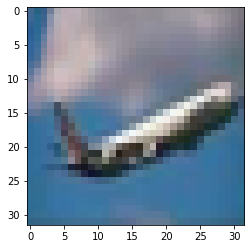

In [ ]:
plt.imshow(x_train[random.choice([i for i, x in enumerate(y_train) if x == classes.index('Самолет')])])

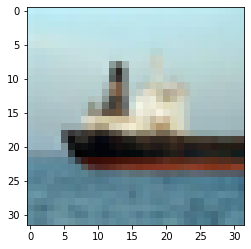

In [ ]:
plt.imshow(x_train[random.choice([i for i, x in enumerate(y_train) if x == classes.index('Корабль')])])

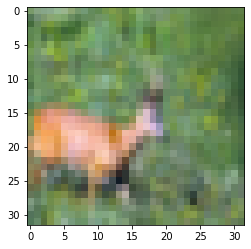

In [ ]:
plt.imshow(x_train[random.choice([i for i, x in enumerate(y_train) if x == classes.index('Олень')])])

# Implement NearestNeighbor class

In [4]:
class KNearestNeighbors:
  def __init__(self, k):
    self.K = k
    pass

  def fit(self, x, y):
    self.X = x
    self.Y = y
    pass
  
  def predict(self, x):
    test = x.shape[0]
    labels = np.zeros(test, dtype=self.Y.dtype)
    distances = []
    for i in range(test):
      distances = np.sum(np.abs(x_train - x_test[i]), axis=1)
      labels[i] = np.argmax(np.bincount(y_train[np.argsort(distances)[0:self.K]].flatten()))
    return labels

##Perform smoke test

- Create model instance
- get predictions for dozen of samples


In [5]:
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

In [187]:
knn = KNearestNeighbors(1)
knn.fit(x_train, y_train)
predicted = knn.predict(x_test)

In [189]:
for i, j in zip(predicted[0:12], y_test.flatten()[0:12]):
  print(classes[predicted[i]] == classes[j], '\t:', classes[predicted[i]], 'vs', classes[j])

False 	: Самолет vs Кошка
True 	: Корабль vs Корабль
False 	: Самолет vs Корабль
True 	: Самолет vs Самолет
False 	: Птица vs Лягушка
False 	: Корабль vs Лягушка
False 	: Корабль vs Автомобиль
True 	: Лягушка vs Лягушка
False 	: Самолет vs Кошка
False 	: Самолет vs Автомобиль
True 	: Самолет vs Самолет
False 	: Самолет vs Грузовик


# Validate your model

## Create validation function

Must calculate Accuracy metric for your model.

In [131]:
def validate(predict, ytest):
    return np.sum(predict == ytest.flatten()) / 500.0

 ## Calculate model accuracy on validation data

In [188]:
validate(predicted, y_test)

0.224

# Place for brief conclusion
Feel free to describe troubles here.


KNN alghoritm was implemented.
Surprisingly, one neighbor gives the largest accuracy.

But maybe, it is fixable by implementatation of more complex label defining (like taking distance in regard).

# Ideas for extra work

- Implenment K-NearestNeighbor
- Test different distance functions
- Find hyperparams using Cross-Validation
- Plot accuracy curve against K
- Evaluate time  